In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as c

In [2]:
P_std = 101325
T_15C = 288.15
e_charge = 1.602e-19
mu_air = 1.00000037*c.mu0.value

In [3]:
# This is to provide some weak dependence of n on lambda.
# This has a modest but appreciable impact in the Frank-Tamm equation due to the factor (1 - 1 / (beta * n))**2)
# Still regard lambda as being photon wavelength in vacuum; lambda = c / nu

def n_air(lam, P=P_std, T=T_15C):
    
    return 1 + 7.76e-7 * (1 + 7.52e-15 / lam**2) * P/T

In [4]:
def d2Ndxdlam(lam, beta, q=e_charge, mu=mu_air):

    return np.pi * q**2 * mu / c.h.value * (c.c.value / lam**2) * (1 - 1 / (beta * n_air(lam))**2)

In [5]:
def dNdx(lam_low, lam_high, beta, q=e_charge, mu=mu_air):

    return quad(d2Ndxdlam, lam_low, lam_high, args=(beta, q, mu))[0]

In [6]:
def get_beta(E, m=c.m_e.value):

    return np.sqrt(1 - m**2 * c.c.value**4 / E**2)

In [7]:
def get_gamma(E, m=c.m_e.value):

    return E / (m * c.c.value**2)

In [8]:
atmos_height = 112.8e3  # m

In [9]:
muon_mass = (105.65837 * u.MeV/c.c**2).to(u.kg).value
muon_mass

1.8835315290027141e-28

In [10]:
muon_lifetime = 2.19698e-6  # s

In [11]:
muon_E_span = np.linspace(5, 150e3, 10000)  # GeV
muon_energies = [5, 10, 50, 100, 500, 1e3, 10e3, 100e3]  # GeV

In [12]:
clrs = ['firebrick', 'darkorange', 'gold', 'lime', 'forestgreen', 'dodgerblue', 'blueviolet', 'fuchsia']

In [13]:
def decay_prob(t, lifetime):

    return 1 - np.exp(-t / lifetime)

In [14]:
def decay_prob_dens(t, lifetime):

    return np.exp(-t / lifetime) / lifetime

In [15]:
times = np.linspace(0, 7e3 * muon_lifetime, 10000)

In [16]:
dists = np.linspace(0, atmos_height, 10000)

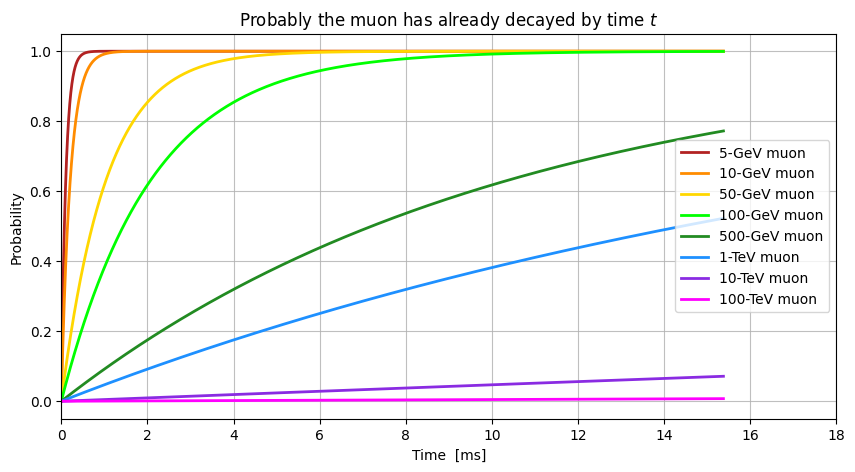

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, E in enumerate(muon_energies):
    gamma = get_gamma(E=E * u.GeV.to(u.J), m=muon_mass)
    if E < 1e3:
        label = str(int(E)) + '-GeV muon'
    else:
        label = str(int(E/1e3)) + '-TeV muon'
    plt.plot(times, decay_prob(times, gamma * muon_lifetime), c=clrs[i], lw=2, label=label)

plt.grid(alpha=0.8)
plt.xlabel('Time  [ms]')
plt.ylabel('Probability')
plt.title(r'Probably the muon has already decayed by time $t$')

ticks = ax.xaxis.axes.get_xticks()
ticks_ms = [str(int(tick * 1e3)) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_ms)

plt.xlim(xmin=0)

plt.legend()
plt.show()

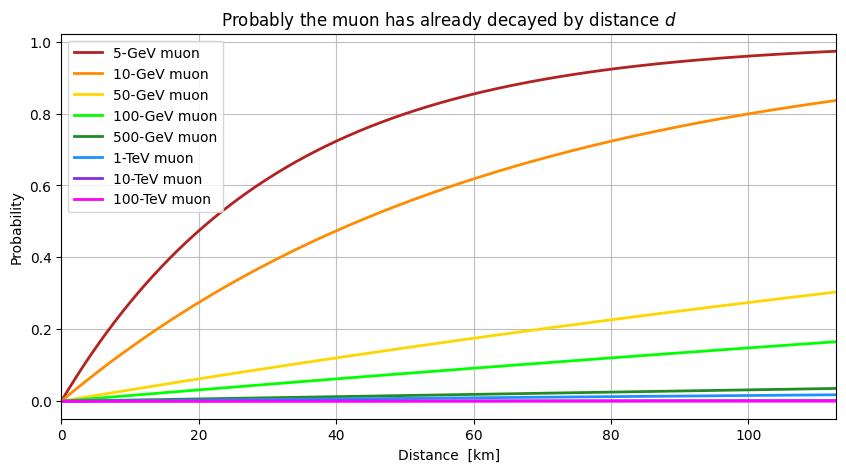

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))

# beta = 0.1
# plt.plot(dists, decay_prob(dists / (c.c.value * beta), (1-0.1**2)**-0.5 * muon_lifetime), c='black', ls='--', lw=2, 
#          label='Muon travelling at 10% the speed of light')

for i, E in enumerate(muon_energies):
    
    gamma = get_gamma(E=E * u.GeV.to(u.J), m=muon_mass)
    beta = get_beta(E=E * u.GeV.to(u.J), m=muon_mass)
    
    if E < 1e3:
        label = str(int(E)) + '-GeV muon'
    else:
        label = str(int(E/1e3)) + '-TeV muon'
        
    plt.plot(dists, decay_prob(dists / (c.c.value * beta), gamma * muon_lifetime), c=clrs[i], lw=2, label=label)

plt.grid(alpha=0.8)
plt.xlabel('Distance  [km]')
plt.ylabel('Probability')
plt.title(r'Probably the muon has already decayed by distance $d$')

ticks = ax.xaxis.axes.get_xticks()
ticks_km = [str(int(tick * 1e-3)) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_km)

plt.xlim(0, atmos_height)

plt.legend()
plt.show()

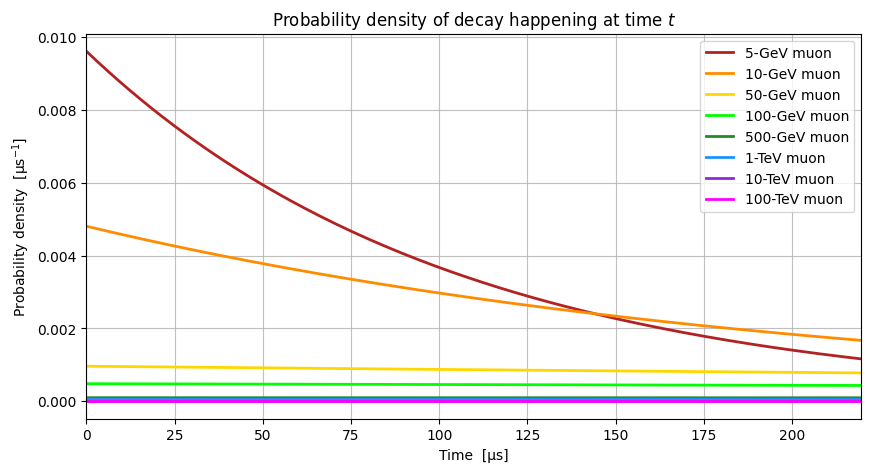

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, E in enumerate(muon_energies):
    gamma = get_gamma(E=E * u.GeV.to(u.J), m=muon_mass)
    if E < 1e3:
        label = str(int(E)) + '-GeV muon'
    else:
        label = str(int(E/1e3)) + '-TeV muon'
    plt.plot(times * 1e6, decay_prob_dens(times * 1e6, gamma * muon_lifetime * 1e6), c=clrs[i], lw=2, label=label)

plt.grid(alpha=0.8)
plt.xlabel('Time  [µs]')
plt.ylabel(r'Probability density  [µs$^{-1}$]')
plt.title(r'Probability density of decay happening at time $t$')

plt.xlim(0, 100 * muon_lifetime * 1e6)

plt.legend()
plt.show()

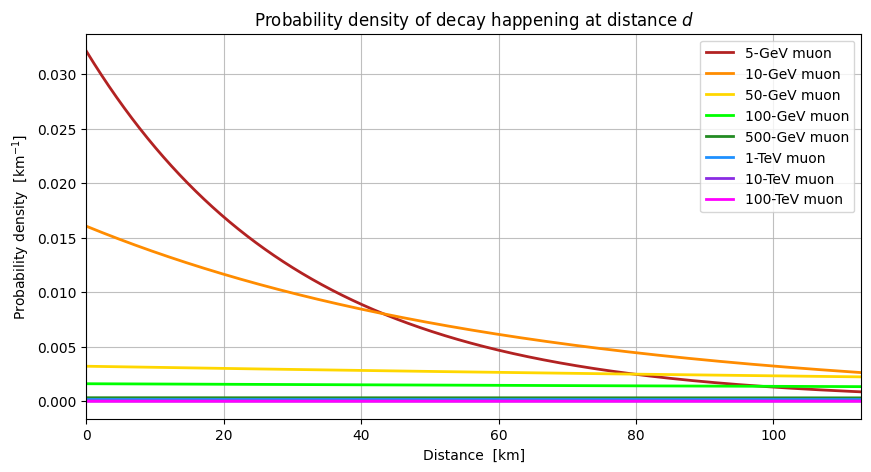

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, E in enumerate(muon_energies):
    gamma = get_gamma(E=E * u.GeV.to(u.J), m=muon_mass)
    if E < 1e3:
        label = str(int(E)) + '-GeV muon'
    else:
        label = str(int(E/1e3)) + '-TeV muon'
    plt.plot(dists * 1e-3, decay_prob_dens(dists * 1e-3, gamma * muon_lifetime * c.c.value * beta * 1e-3), 
             c=clrs[i], lw=2, label=label)

plt.grid(alpha=0.8)
plt.xlabel('Distance  [km]')
plt.ylabel(r'Probability density  [km$^{-1}$]')
plt.title(r'Probability density of decay happening at distance $d$')

plt.xlim(0, atmos_height * 1e-3)

plt.legend()
plt.show()